In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import accuracy_score

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [ ]:
# Preprocess the data
X_train = X_train.reshape((60000, 28, 28, 1)) / 255.0
X_test = X_test.reshape((10000, 28, 28, 1)) / 255.0
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

In [ ]:
# Define the MLP model
def create_mlp_model():
    model = keras.Sequential([
        keras.layers.Flatten(input_shape=(28, 28, 1)),
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(10, activation='softmax')
    ])

    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

In [ ]:
# Create and train the MLP model
model = create_mlp_model()
model.summary()

history = model.fit(X_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.1,
                    verbose=1)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_6 (Dense)             (None, 10)                650       
                                                                 
Total params: 109386 (427.29 KB)
Trainable params: 109

In [ ]:
# Evaluate the model
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)
y_true = np.argmax(y_test, axis=1)
accuracy = accuracy_score(y_true, y_pred)
print("Test Accuracy:", accuracy)

313/313 [==============================] - 1s 2ms/step
Test Accuracy: 0.9776


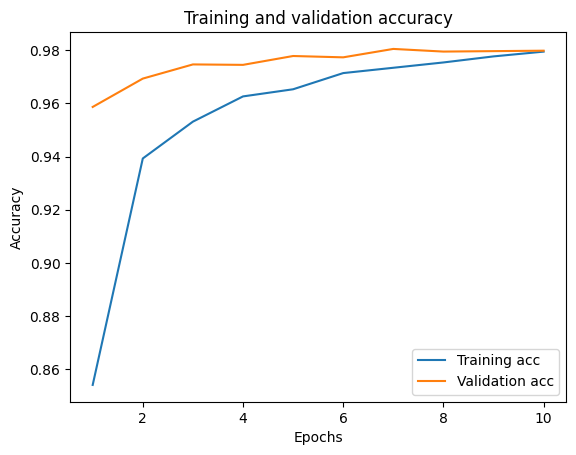

In [ ]:
# Plot the training and validation accuracy
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, label='Training acc')
plt.plot(epochs, val_acc, label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

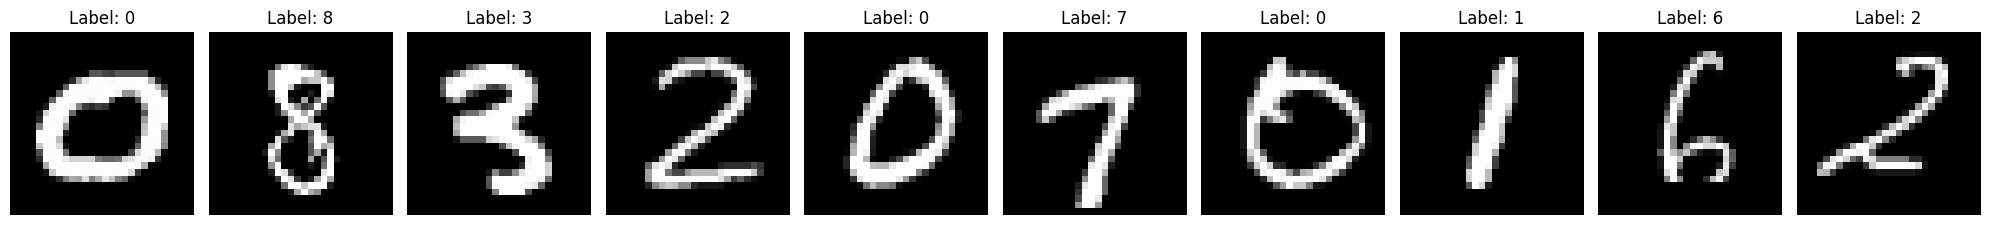

In [ ]:
# Visualize a subset of the dataset
num_samples = 10
indices = np.random.choice(len(X_train), num_samples, replace=False)

fig, axes = plt.subplots(1, num_samples, figsize=(20, 4))
for i, index in enumerate(indices):
    image = X_train[index].reshape(28, 28)
    axes[i].imshow(image, cmap='gray')
    axes[i].set_title(f"Label: {np.argmax(y_train[index])}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()

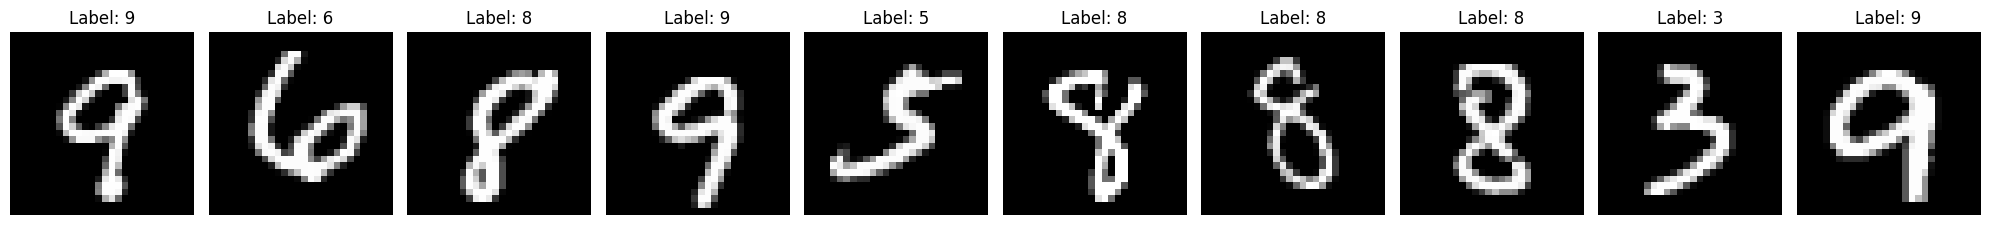

In [ ]:
# Visualize a subset of the dataset
num_samples = 10
indices = np.random.choice(len(X_test), num_samples, replace=False)

fig, axes = plt.subplots(1, num_samples, figsize=(20, 4))
for i, index in enumerate(indices):
    image = X_test[index].reshape(28, 28)
    axes[i].imshow(image, cmap='gray')
    axes[i].set_title(f"Label: {np.argmax(y_test[index])}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
def create_mlp_model2():
    model = keras.Sequential([
        keras.layers.Flatten(input_shape=(28, 28, 1)),
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dropout(0.2),
        # keras.layers.Dense(64, activation='relu'),
        # keras.layers.Dropout(0.2),
        keras.layers.Dense(10, activation='softmax')
    ])

    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

In [ ]:
model2 = create_mlp_model()
model2.summary()

history2 = model.fit(X_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.1,
                    verbose=1)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_7 (Dense)             (None, 128)               100480    
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_8 (Dense)             (None, 64)                8256      
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_9 (Dense)             (None, 10)                650       
                                                                 
Total params: 109386 (427.29 KB)
Trainable params: 109

In [ ]:
y_pred_prob1 = model2.predict(X_test)
y_pred1 = np.argmax(y_pred_prob1, axis=1)
y_true1 = np.argmax(y_test, axis=1)
accuracy1 = accuracy_score(y_true1, y_pred1)
print("Test Accuracy:", accuracy1)

313/313 [==============================] - 1s 2ms/step
Test Accuracy: 0.1448
